In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory # type: ignore
from tensorflow.keras.metrics import Metric, Precision, Recall


DATA PREPARATION

In [2]:
training_set = image_dataset_from_directory(
    "./train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 76515 files belonging to 4 classes.


In [ ]:
validation_set = image_dataset_from_directory(
    "./val",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 21861 files belonging to 4 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
INPUT_SHAPE=(224,224,3)

In [6]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    #name="MobileNetV3Large",
)

In [7]:
'''
If you want to perform transfer learning then execute this cell
'''

#mobnet.trainable = False   #False -- to freeze weights of this pretrained model  (Only Dense layer can be modified)

'\nIf you want to perform transfer learning then execute this cell\n'

In [8]:
model = tf.keras.models.Sequential()

In [9]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [10]:
model.add(mobnet)

In [11]:
model.add(tf.keras.layers.Dense(units=4,activation="softmax"))

In [13]:
# Define custom F1Score metric
class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

In [14]:
metrics_list = ["accuracy", F1Score()]

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=metrics_list)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [16]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15
2392/2392 [==============================] - 10412s 4s/step - loss: 1.1368 - accuracy: 0.8781 - f1_score: 0.0000e+00 - val_loss: 0.9753 - val_accuracy: 0.8578 - val_f1_score: 0.0000e+00
Epoch 2/15
2392/2392 [==============================] - 13205s 6s/step - loss: 0.8390 - accuracy: 0.8857 - f1_score: 0.5204 - val_loss: 0.7218 - val_accuracy: 0.8952 - val_f1_score: 0.8685
Epoch 3/15
2392/2392 [==============================] - 9927s 4s/step - loss: 0.6337 - accuracy: 0.9273 - f1_score: 0.8700 - val_loss: 0.5669 - val_accuracy: 0.9435 - val_f1_score: 0.8622
Epoch 4/15
2392/2392 [==============================] - 8317s 3s/step - loss: 0.4920 - accuracy: 0.9567 - f1_score: 0.8720 - val_loss: 0.4329 - val_accuracy: 0.9579 - val_f1_score: 0.8724
Epoch 5/15
2392/2392 [==============================] - 4992s 2s/step - loss: 0.3866 - accuracy: 0.9592 - f1_score: 0.9238 - val_loss: 0.3414 - val_accuracy: 0.9618 - val_f1_score: 0.9304
Epoch 6/15
2392/2392 [============================

In [17]:
model.save("./Trained_Eye_disease_model.h5")
model.save("./Trained_Eye_disease_model.keras")

In [18]:
training_history

In [19]:
training_history.history

{'loss': [1.136765718460083,
  0.8389551043510437,
  0.6337480545043945,
  0.49197885394096375,
  0.38655635714530945,
  0.2997327446937561,
  0.23460792005062103,
  0.18450190126895905,
  0.1485278606414795,
  0.12032656371593475,
  0.10000696778297424,
  0.08464951068162918,
  0.0727638378739357,
  0.06558936834335327,
  0.05663696676492691],
 'accuracy': [0.8780892491340637,
  0.885721743106842,
  0.9272691607475281,
  0.956662118434906,
  0.959236741065979,
  0.9673920273780823,
  0.9728811383247375,
  0.9765143990516663,
  0.9796379804611206,
  0.9826570153236389,
  0.9852185845375061,
  0.9868914484977722,
  0.9885774254798889,
  0.988943338394165,
  0.9902895092964172],
 'f1_score': [0.0,
  0.5203922986984253,
  0.8699582815170288,
  0.8720402121543884,
  0.9237736463546753,
  0.9547768235206604,
  0.9730101227760315,
  0.9764694571495056,
  0.979703962802887,
  0.9826973676681519,
  0.9852668046951294,
  0.9868367314338684,
  0.9884791970252991,
  0.9889116287231445,
  0.990363

In [20]:
#Saving history
import pickle
with open("Training_history.pkl",'wb') as file:
    pickle.dump(training_history.history,file)


RELOADING HISTORY FROM PICKLE FILE

In [2]:
import pickle
with open("Training_history.pkl","rb") as file :
    load_history = pickle.load(file)
print(load_history)

{'loss': [1.136765718460083, 0.8389551043510437, 0.6337480545043945, 0.49197885394096375, 0.38655635714530945, 0.2997327446937561, 0.23460792005062103, 0.18450190126895905, 0.1485278606414795, 0.12032656371593475, 0.10000696778297424, 0.08464951068162918, 0.0727638378739357, 0.06558936834335327, 0.05663696676492691], 'accuracy': [0.8780892491340637, 0.885721743106842, 0.9272691607475281, 0.956662118434906, 0.959236741065979, 0.9673920273780823, 0.9728811383247375, 0.9765143990516663, 0.9796379804611206, 0.9826570153236389, 0.9852185845375061, 0.9868914484977722, 0.9885774254798889, 0.988943338394165, 0.9902895092964172], 'f1_score': [0.0, 0.5203922986984253, 0.8699582815170288, 0.8720402121543884, 0.9237736463546753, 0.9547768235206604, 0.9730101227760315, 0.9764694571495056, 0.979703962802887, 0.9826973676681519, 0.9852668046951294, 0.9868367314338684, 0.9884791970252991, 0.9889116287231445, 0.9903638362884521], 'val_loss': [0.9753406643867493, 0.7217915654182434, 0.5669050812721252, 

In [3]:
load_history.keys()

dict_keys(['loss', 'accuracy', 'f1_score', 'val_loss', 'val_accuracy', 'val_f1_score'])

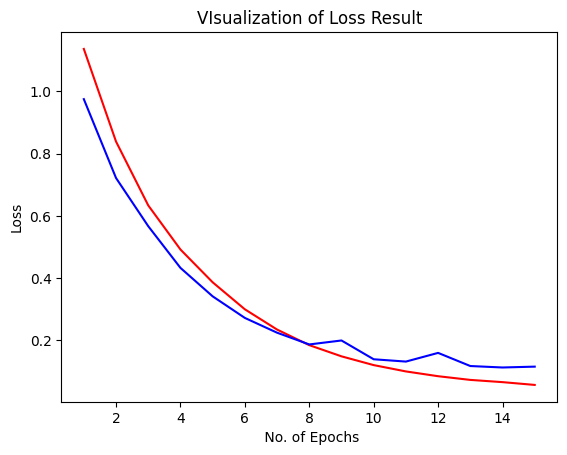

In [4]:
#LOSS VISUALISATION 

epochs =[i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Training Loss')
plt.xlabel(" No. of Epochs")
plt.ylabel("Loss")
plt.title("VIsualization of Loss Result")
plt.show()


MODEL EVALUAtION

In [5]:
import tensorflow as tf

# Load the model without compiling
model = tf.keras.models.load_model("Trained_Eye_disease_model.h5", compile=False)

# Verify the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 1000)             5507432   
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5,511,436
Trainable params: 5,487,036
Non-trainable params: 24,400
_________________________________________________________________


In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
test_set = image_dataset_from_directory(
    "./test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 10933 files belonging to 4 classes.


In [24]:
test_loss,test_acc= model.evaluate(test_set)

342/342 [==============================] - 158s 460ms/step - loss: 0.1206 - accuracy: 0.9706


In [25]:
print("Test loss : ",test_loss)
print("Test accuracy : ",test_acc)

Test loss :  0.12058097124099731
Test accuracy :  0.9706393480300903


Computing True label from test set 

In [26]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
Y_true = tf.argmax(true_categories,axis=1)



In [27]:
true_categories

<tf.Tensor: shape=(10933, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [28]:
Y_true

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

Computing Predicted labels using test_set

In [29]:
predicted_categories = model.predict(test_set)

342/342 [==============================] - 181s 530ms/step


In [30]:
predicted_categories

array([[0.9844604 , 0.00441158, 0.00650212, 0.00462582],
       [0.9844514 , 0.00441327, 0.00650732, 0.00462806],
       [0.9844604 , 0.00441158, 0.00650212, 0.00462582],
       ...,
       [0.00299843, 0.00361626, 0.00498543, 0.9884    ],
       [0.00299843, 0.00361626, 0.00498543, 0.9884    ],
       [0.00299843, 0.00361626, 0.00498543, 0.9884    ]], dtype=float32)

In [31]:
Y_predict = tf.argmax(predicted_categories,axis=1)

In [33]:
Y_predict

<tf.Tensor: shape=(10933,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

1. Classification Report 

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_predict))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3746
           1       0.97      0.94      0.96      1161
           2       0.85      0.91      0.88       887
           3       0.98      0.99      0.99      5139

    accuracy                           0.97     10933
   macro avg       0.95      0.95      0.95     10933
weighted avg       0.97      0.97      0.97     10933



2. Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_predict)
cm

array([[3602,   19,  118,    7],
       [  18, 1095,    4,   44],
       [  31,    3,  810,   43],
       [   4,    9,   21, 5105]], dtype=int64)

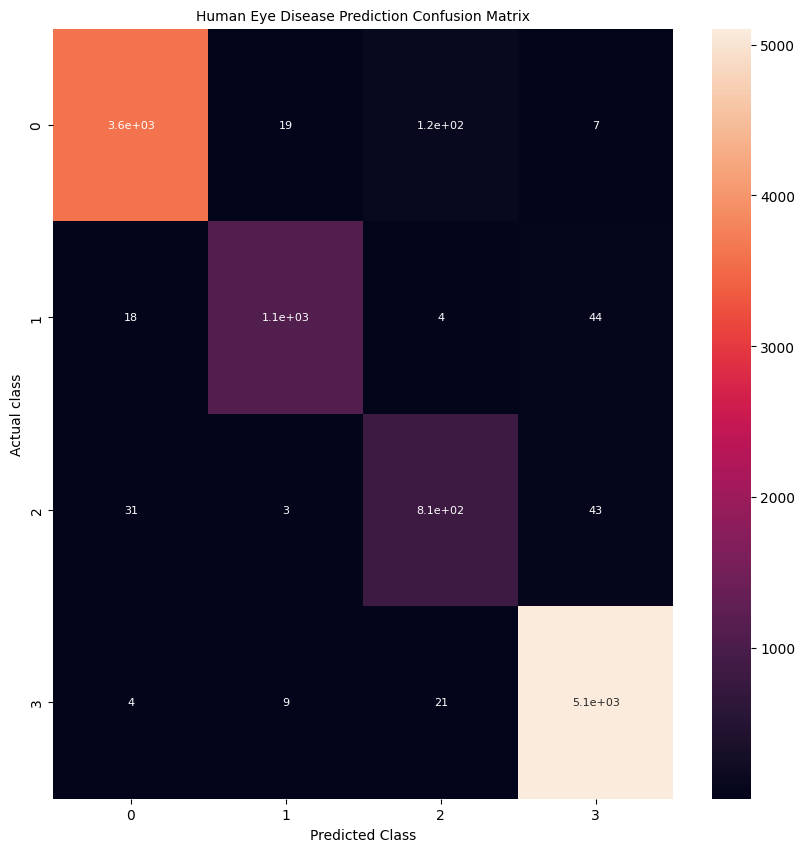

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=10)
plt.show()